      0  1  2
  0|         |  0
  1|        4|  1
  2|         |  2
      0  1  2


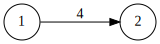

In [13]:
# Exercise 2: BuildMatrix.c
import pygraphblas as grb
from pygraphblas.demo.gviz import draw, draw_op

#TODO: is there no need for GrB_init()?

def BuildMatrix():
    NUM_NODES = 3
    graph = grb.Matrix.sparse(grb.types.UINT64, NUM_NODES, NUM_NODES)
    graph[[1, 2]] = 4

    print(graph)
    return graph
    
draw(BuildMatrix())

      0  1  2
  0|     2   |  0
  1|  2     4|  1
  2|     4   |  2
      0  1  2


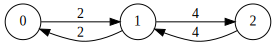

In [14]:
# Exercise 3: BuildAdjMatTuple.c
import pygraphblas as grb
from pygraphblas.demo.gviz import draw, draw_op

def BuildAdjMatTuple():
    NUM_NODES = 3
    graph = grb.Matrix.sparse(grb.types.UINT64, NUM_NODES, NUM_NODES)
    graph[[1, 2]] = 4
    graph[[2, 1]] = 4
    graph[[0, 1]] = 2
    graph[[1, 0]] = 2

    print(graph)
    return graph

draw(BuildAdjMatTuple())

      0  1  2  3  4  5  6
  0|     t     t         |  0
  1|              t     t|  1
  2|                 t   |  2
  3|  t     t            |  3
  4|                 t   |  4
  5|        t            |  5
  6|        t  t  t      |  6
      0  1  2  3  4  5  6


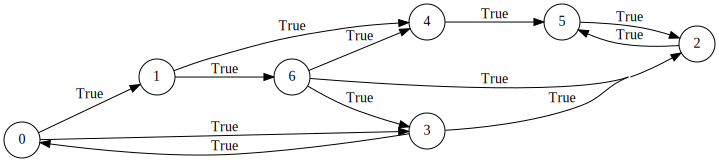

In [18]:
# Exercise 4: BuildAdjMatIndVec.c
import pygraphblas as grb
from pygraphblas.demo.gviz import draw, draw_op

def BuildAdjMatIndVec():
    NUM_NODES = 7
    NUM_EDGES = 12
    row_indices = [0,0,1,1,2,3,3,4,5,6,6,6]
    col_indices = [1,3,4,6,5,0,2,5,2,2,3,4]
    values      = [True, True, True, True, True, True, True, True, True, True, True, True]
    #graph = grb.Matrix.sparse(grb.types.BOOL, NUM_NODES, NUM_NODES)
    graph = grb.Matrix.from_lists(row_indices, col_indices, values, NUM_NODES, NUM_NODES, grb.types.BOOL)

    print(graph)
    return graph

draw(BuildAdjMatIndVec())

In [25]:
# Exercise 5: matvec.c
import pygraphblas as grb
from pygraphblas.demo.gviz import draw, draw_op

def matvec():
    NUM_NODES = 7
    NUM_EDGES = 12
    row_indices = [0,0,1,1,2,3,3,4,5,6,6,6]
    col_indices = [1,3,4,6,5,0,2,5,2,2,3,4]
    values      = [True, True, True, True, True, True, True, True, True, True, True, True]
    #graph = grb.Matrix.sparse(grb.types.BOOL, NUM_NODES, NUM_NODES)
    graph = grb.Matrix.from_lists(row_indices, col_indices, values, NUM_NODES, NUM_NODES, grb.types.BOOL)
    
    NODE = 2
    vec = grb.Vector.sparse(grb.types.BOOL, NUM_NODES)
    vec[NODE] = True

    with grb.semiring.LOR_LAND:
        result = graph @ vec
    
    print(graph)
    print(vec)
    return result

print(matvec())

      0  1  2  3  4  5  6
  0|     t     t         |  0
  1|              t     t|  1
  2|                 t   |  2
  3|  t     t            |  3
  4|                 t   |  4
  5|        t            |  5
  6|        t  t  t      |  6
      0  1  2  3  4  5  6
0|  
1|  
2| t
3|  
4|  
5|  
6|  

0|  
1|  
2|  
3| t
4|  
5| t
6| t



In [26]:
# Exercise 6: matvecTrans.c
import pygraphblas as grb
from pygraphblas.demo.gviz import draw, draw_op

def matvecTrans():
    NUM_NODES = 7
    NUM_EDGES = 12
    row_indices = [0,0,1,1,2,3,3,4,5,6,6,6]
    col_indices = [1,3,4,6,5,0,2,5,2,2,3,4]
    values      = [True, True, True, True, True, True, True, True, True, True, True, True]
    #graph = grb.Matrix.sparse(grb.types.BOOL, NUM_NODES, NUM_NODES)
    graph = grb.Matrix.from_lists(row_indices, col_indices, values, NUM_NODES, NUM_NODES, grb.types.BOOL)
    
    NODE = 6
    vec = grb.Vector.sparse(grb.types.BOOL, NUM_NODES)
    vec[NODE] = True

    with grb.semiring.LOR_LAND:
        result = graph.T @ vec
    
    print(graph)
    print(vec)
    return result

print(matvecTrans())

      0  1  2  3  4  5  6
  0|     t     t         |  0
  1|              t     t|  1
  2|                 t   |  2
  3|  t     t            |  3
  4|                 t   |  4
  5|        t            |  5
  6|        t  t  t      |  6
      0  1  2  3  4  5  6
0|  
1|  
2|  
3|  
4|  
5|  
6| t

0|  
1|  
2| t
3| t
4| t
5|  
6|  



In [ ]:
# Exercise 7 on working with different semirings was skipped

In [32]:
# Exercise 8: matvecTransIter.c  Iterative mxv to visit neighbors (fixed iteration)

import pygraphblas as grb
from pygraphblas.demo.gviz import draw, draw_op

def matvecTransIter():
    NUM_NODES = 7
    NUM_EDGES = 12
    row_indices = [0,0,1,1,2,3,3,4,5,6,6,6]
    col_indices = [1,3,4,6,5,0,2,5,2,2,3,4]
    values      = [True, True, True, True, True, True, True, True, True, True, True, True]
    #graph = grb.Matrix.sparse(grb.types.BOOL, NUM_NODES, NUM_NODES)
    graph = grb.Matrix.from_lists(row_indices, col_indices, values, NUM_NODES, NUM_NODES, grb.types.BOOL)
    print(graph)
    
    SRC_NODE = 0
    w = grb.Vector.sparse(grb.types.BOOL, NUM_NODES)
    w[SRC_NODE] = True

    with grb.semiring.LOR_LAND:
        for iter in range(NUM_NODES):
            w = graph.T @ w
            print("Iteration:", iter,"wavefront:")
            print(w)

matvecTransIter()

      0  1  2  3  4  5  6
  0|     t     t         |  0
  1|              t     t|  1
  2|                 t   |  2
  3|  t     t            |  3
  4|                 t   |  4
  5|        t            |  5
  6|        t  t  t      |  6
      0  1  2  3  4  5  6
Iteration: 0 wavefront:
0|  
1| t
2|  
3| t
4|  
5|  
6|  

Iteration: 1 wavefront:
0| t
1|  
2| t
3|  
4| t
5|  
6| t

Iteration: 2 wavefront:
0|  
1| t
2| t
3| t
4| t
5| t
6|  

Iteration: 3 wavefront:
0| t
1|  
2| t
3|  
4| t
5| t
6| t

Iteration: 4 wavefront:
0|  
1| t
2| t
3| t
4| t
5| t
6|  

Iteration: 5 wavefront:
0| t
1|  
2| t
3|  
4| t
5| t
6| t

Iteration: 6 wavefront:
0|  
1| t
2| t
3| t
4| t
5| t
6|  



In [33]:
# Exercise 9: matvecTransIterVisited.c  Iterative mxv to visit neighbors + build visited (fixed iteration)

import pygraphblas as grb
from pygraphblas.demo.gviz import draw, draw_op

def matvecTransIter():
    NUM_NODES = 7
    NUM_EDGES = 12
    row_indices = [0,0,1,1,2,3,3,4,5,6,6,6]
    col_indices = [1,3,4,6,5,0,2,5,2,2,3,4]
    values      = [True, True, True, True, True, True, True, True, True, True, True, True]
    #graph = grb.Matrix.sparse(grb.types.BOOL, NUM_NODES, NUM_NODES)
    graph = grb.Matrix.from_lists(row_indices, col_indices, values, NUM_NODES, NUM_NODES, grb.types.BOOL)
    print(graph)
    
    SRC_NODE = 0
    w = grb.Vector.sparse(grb.types.BOOL, NUM_NODES) #wavefront
    v = grb.Vector.sparse(grb.types.BOOL, NUM_NODES) #visited
    w[SRC_NODE] = True

    with grb.semiring.LOR_LAND:
        for iter in range(NUM_NODES):
            v += w     # TODO: does this use LOR?
            print("Iteration:", iter)
            print("visited:")
            print(v)
            w = graph.T @ w
            print("wavefront:")
            print(w)

matvecTransIter()

      0  1  2  3  4  5  6
  0|     t     t         |  0
  1|              t     t|  1
  2|                 t   |  2
  3|  t     t            |  3
  4|                 t   |  4
  5|        t            |  5
  6|        t  t  t      |  6
      0  1  2  3  4  5  6
Iteration: 0
visited:
0| t
1|  
2|  
3|  
4|  
5|  
6|  

wavefront:
0|  
1| t
2|  
3| t
4|  
5|  
6|  

Iteration: 1
visited:
0| t
1| t
2|  
3| t
4|  
5|  
6|  

wavefront:
0| t
1|  
2| t
3|  
4| t
5|  
6| t

Iteration: 2
visited:
0| t
1| t
2| t
3| t
4| t
5|  
6| t

wavefront:
0|  
1| t
2| t
3| t
4| t
5| t
6|  

Iteration: 3
visited:
0| t
1| t
2| t
3| t
4| t
5| t
6| t

wavefront:
0| t
1|  
2| t
3|  
4| t
5| t
6| t

Iteration: 4
visited:
0| t
1| t
2| t
3| t
4| t
5| t
6| t

wavefront:
0|  
1| t
2| t
3| t
4| t
5| t
6|  

Iteration: 5
visited:
0| t
1| t
2| t
3| t
4| t
5| t
6| t

wavefront:
0| t
1|  
2| t
3|  
4| t
5| t
6| t

Iteration: 6
visited:
0| t
1| t
2| t
3| t
4| t
5| t
6| t

wavefront:
0|  
1| t
2| t
3| t
4| t
5| t
6|  



In [36]:
# Exercise 10: matvecTransIterVisitedExitFlag.c  Iterative mxv to visit neighbors + build visited (exit flag)

import pygraphblas as grb
from pygraphblas.demo.gviz import draw, draw_op

def matvecTransIterExitFlag():
    NUM_NODES = 7
    NUM_EDGES = 12
    row_indices = [0,0,1,1,2,3,3,4,5,6,6,6]
    col_indices = [1,3,4,6,5,0,2,5,2,2,3,4]
    values      = [True, True, True, True, True, True, True, True, True, True, True, True]
    #graph = grb.Matrix.sparse(grb.types.BOOL, NUM_NODES, NUM_NODES)
    graph = grb.Matrix.from_lists(row_indices, col_indices, values, NUM_NODES, NUM_NODES, grb.types.BOOL)
    print(graph)
    
    SRC_NODE = 0
    w = grb.Vector.sparse(grb.types.BOOL, NUM_NODES) #wavefront
    v = grb.Vector.sparse(grb.types.BOOL, NUM_NODES) #visited
    w[SRC_NODE] = True

    with grb.semiring.LOR_LAND:
        while w.nvals > 0:
            v += w     # TODO: does this use LOR?
            print("Iteration:", iter)
            print("visited:")
            print(v)
            
            #w = graph.T @ w
            graph.mxv(w, mask=v, out=w, desc=grb.RCT0)
            print("wavefront:")
            print(w)

matvecTransIterExitFlag()

      0  1  2  3  4  5  6
  0|     t     t         |  0
  1|              t     t|  1
  2|                 t   |  2
  3|  t     t            |  3
  4|                 t   |  4
  5|        t            |  5
  6|        t  t  t      |  6
      0  1  2  3  4  5  6
Iteration: <built-in function iter>
visited:
0| t
1|  
2|  
3|  
4|  
5|  
6|  

wavefront:
0|  
1|  
2|  
3|  
4|  
5|  
6|  

